# Internet Advertisements

Image data has been given from the internet. The aim is to predict if an image is an Advertisement (Ad) or not an Advertisement (non-Ad)

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
data = pd.read_csv("data/data/training.csv",header=None)
data.rename(columns={1558:"Target"},inplace=True)
data.replace('nonad.',0,inplace=True)
data.replace('ad.',1,inplace=True)
data.replace('   ?',np.nan,inplace=True)
print("Shape of the Training Data :",data.shape)

Shape of the Training Data : (2623, 1559)


In [74]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,Target
0,NaN,NaN,?,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,?,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,60,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28,230,8.2142,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,216,9.3913,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


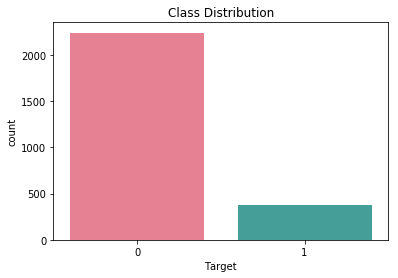

In [75]:
fig1 = sns.countplot(x="Target",data=data,palette='husl')
plt.title("Class Distribution")
plt.show()

In [92]:
sns.distplot(data[data.columns[0:3]].isnull(),hist=True)
plt.show()

ValueError: color kwarg must have one color per dataset